In [1]:
import pandas as pd
df = pd.read_csv('exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [11]:
# Check for missing values
df.isnull().sum()

# Fill or interpolate missing values if necessary
df = df.fillna(method='ffill')


<Axes: >

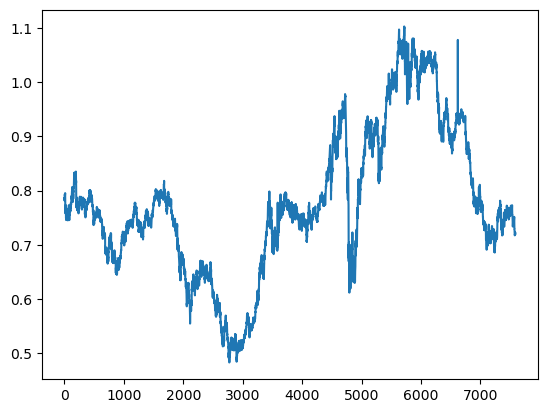

In [17]:

# line plot
df.Ex_rate.plot()

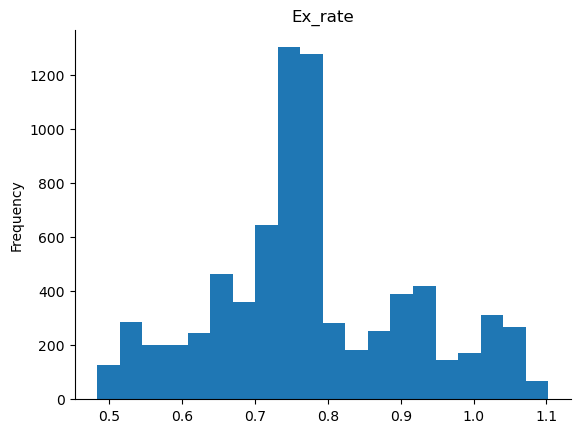

In [18]:

from matplotlib import pyplot as plt
df['Ex_rate'].plot(kind='hist', bins=20, title='Ex_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Model Building - ARIMA

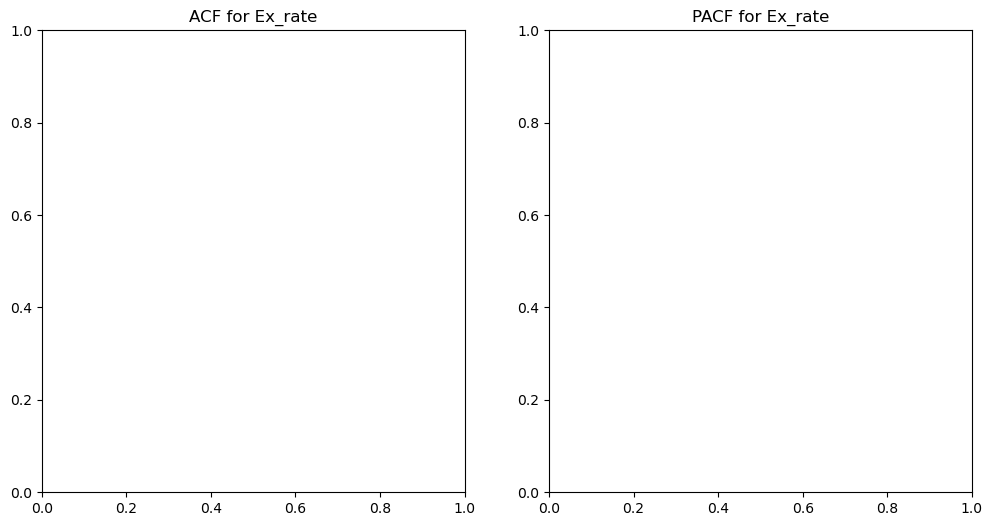

Estimated parameters for Ex_rate: p=2, d=1, q=1


In [23]:

# Import necessary libraries
from statsmodels.tsa.stattools import acf, pacf

# Select one currency time series
currency = df['Ex_rate']

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
acf(currency, nlags=20)
plt.title('ACF for ' + currency.name)

plt.subplot(1, 2, 2)
pacf(currency, nlags=20)
plt.title('PACF for ' + currency.name)
plt.show()

# Estimate initial parameters based on plots
p = 2 # Number of autoregressive terms
d = 1 # Number of differencing terms
q = 1 # Number of moving average terms

print(f'Estimated parameters for {currency.name}: p={p}, d={d}, q={q}')


In [25]:
# 2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df['Ex_rate'], order=(p, d, q))
results = model.fit()

# Print the model summary
print(results)

C:\Users\New\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\New\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


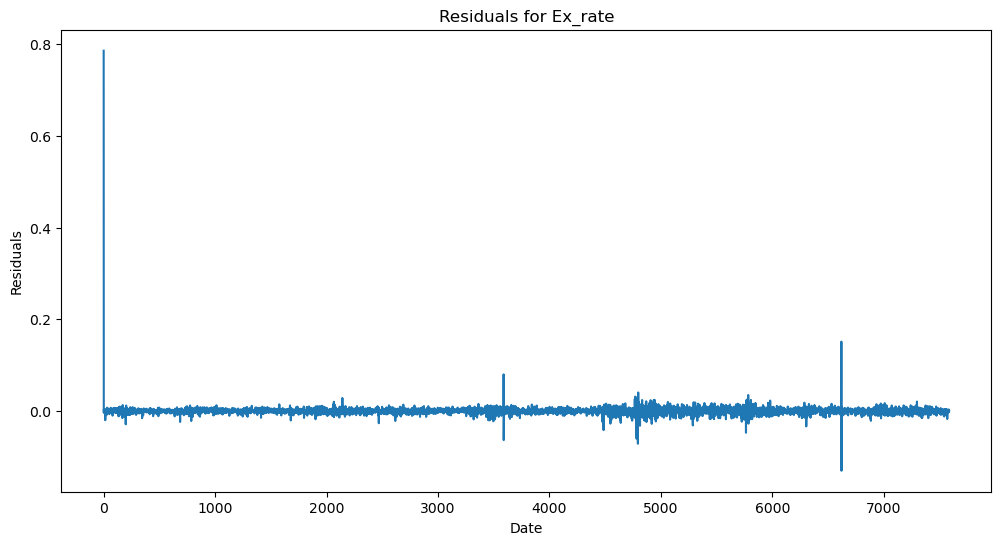

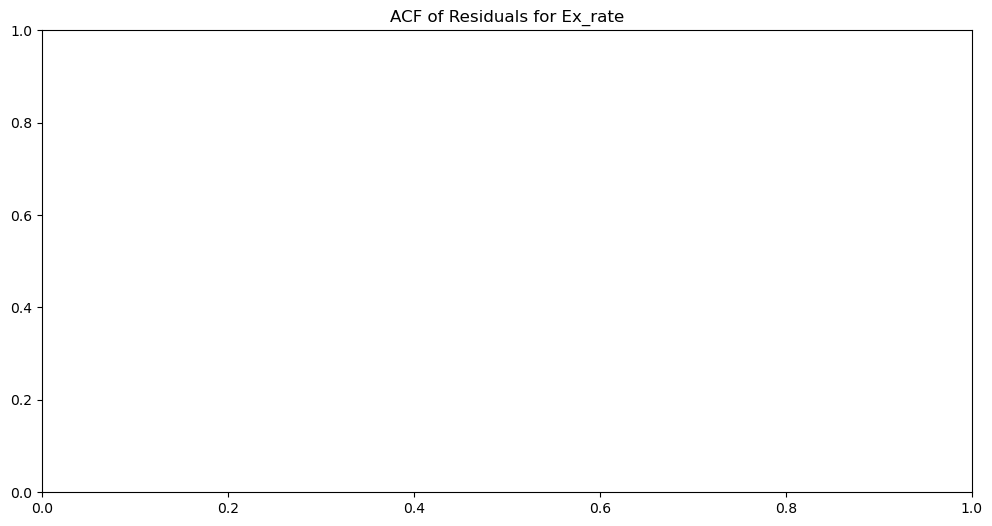

C:\Users\New\AppData\Local\Temp\ipykernel_5428\441310183.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


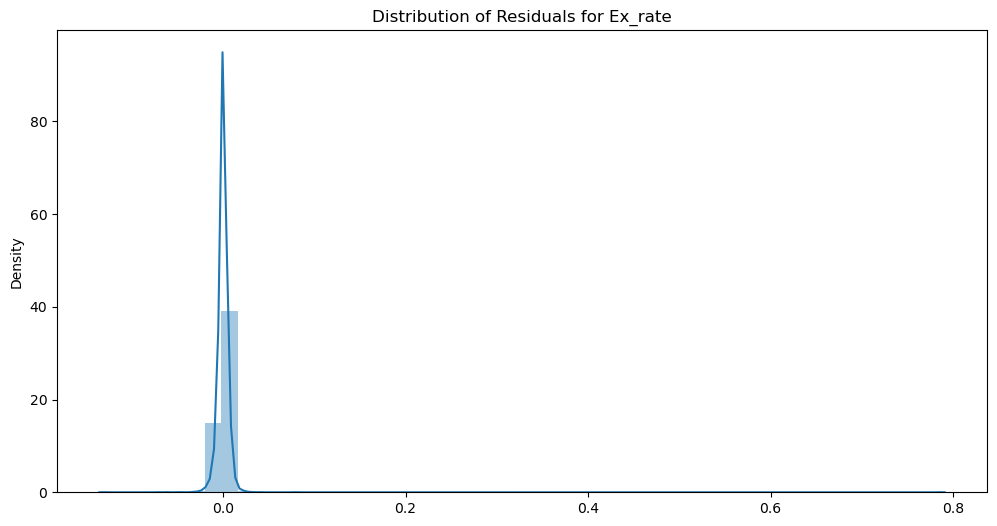

In [27]:
#3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies

# Extract the residuals from the fitted model
residuals = results.resid
import seaborn as sns
# Plot the residuals over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, residuals)
plt.title('Residuals for ' + currency.name)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Check for autocorrelation in the residuals
plt.figure(figsize=(12, 6))
acf(residuals, nlags=20)
plt.title('ACF of Residuals for ' + currency.name)
plt.show()

# Check for normality of the residuals
plt.figure(figsize=(12, 6))
sns.distplot(residuals, kde=True)
plt.title('Distribution of Residuals for ' + currency.name)
plt.show()


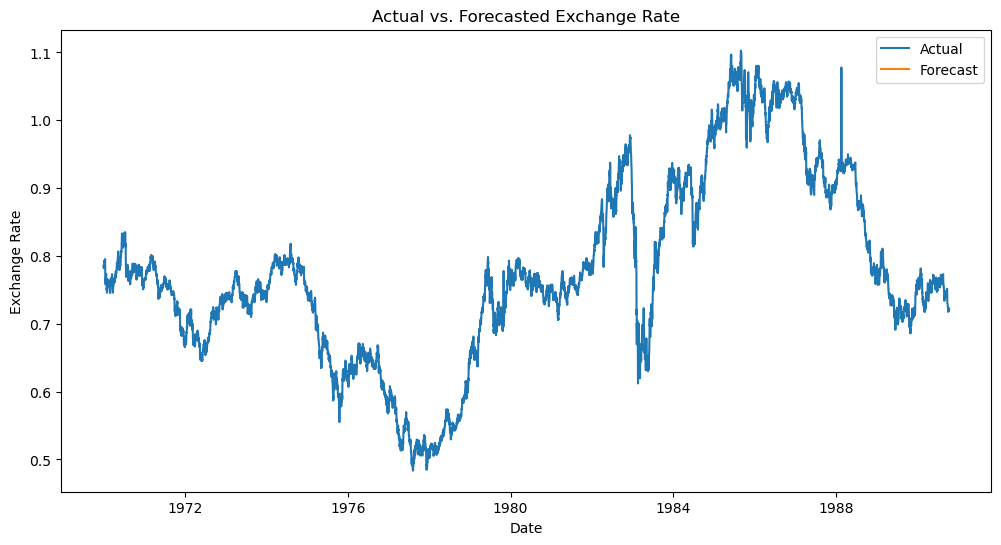

In [28]:
#4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

# Import necessary libraries

# Define the number of steps to forecast
n_steps = 10

# Forecast the next n_steps values
forecast = results.forecast(steps=n_steps)

# Create a new dataframe to store the forecasted values
forecast_df = pd.DataFrame({'Forecast': forecast}, index=pd.date_range(start=df.index[-1], periods=n_steps + 1, freq='D'))

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
plt.title('Actual vs. Forecasted Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


C:\Users\New\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                        Exponential Smoothing Results                         
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                   ETS(A, A, A)   Log Likelihood               27944.104
Date:                Sat, 18 May 2024   AIC                         -55864.207
Time:                        13:16:13   BIC                         -55780.995
Sample:                             0   HQIC                        -55835.650
                               - 7588   Scale                            0.000
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9979      0.003    334.745      0.000       0.992       1.004
smoothing_trend         0.0126      0.001      9.078      0.000       0.010       0.015
smoothing_season

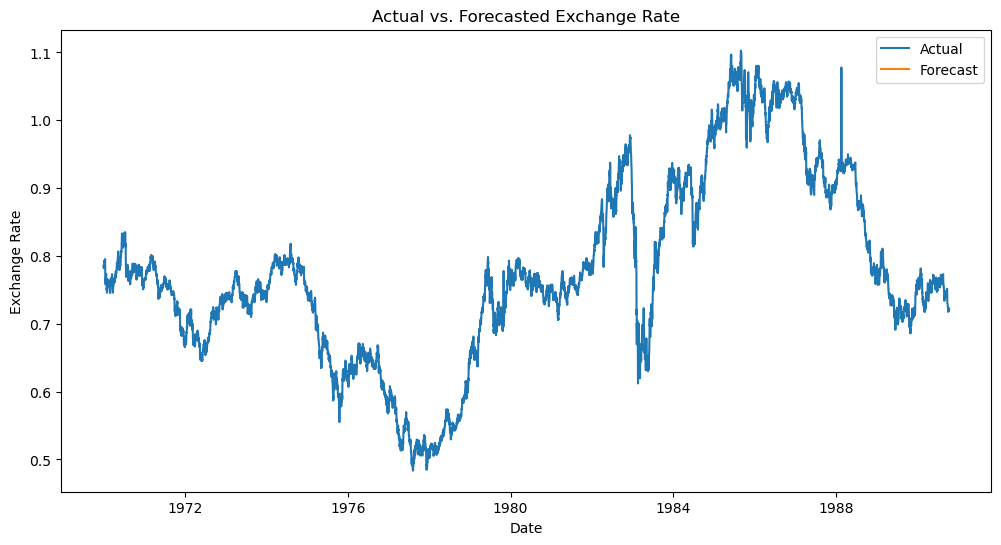

In [30]:
# Import necessary libraries
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

# Select the appropriate model based on time series characteristics
model = ExponentialSmoothing(df['Ex_rate'], trend='additive', seasonal=7)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast the next n_steps values
n_steps = 10
forecast = model_fit.forecast(steps=n_steps)

# Create a new dataframe to store the forecasted values
forecast_df = pd.DataFrame({'Forecast': forecast}, index=pd.date_range(start=df.index[-1], periods=n_steps + 1, freq='D'))

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
plt.title('Actual vs. Forecasted Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

C:\Users\New\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                        Exponential Smoothing Results                         
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                   ETS(A, A, A)   Log Likelihood               27944.104
Date:                Sat, 18 May 2024   AIC                         -55864.207
Time:                        13:24:29   BIC                         -55780.995
Sample:                             0   HQIC                        -55835.650
                               - 7588   Scale                            0.000
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9979      0.003    334.745      0.000       0.992       1.004
smoothing_trend         0.0126      0.001      9.078      0.000       0.010       0.015
smoothing_season

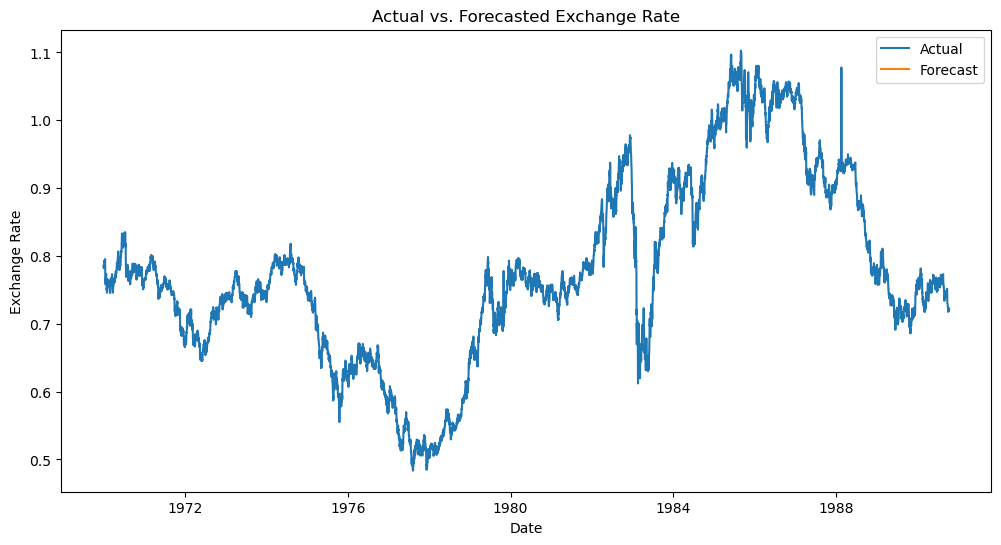

In [31]:
# Import necessary libraries
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

# Select the appropriate model based on time series characteristics
model = ExponentialSmoothing(df['Ex_rate'], trend='additive', seasonal=int(7))

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast the next n_steps values
n_steps = 10
forecast = model_fit.forecast(steps=n_steps)

# Create a new dataframe to store the forecasted values
forecast_df = pd.DataFrame({'Forecast': forecast}, index=pd.date_range(start=df.index[-1], periods=n_steps + 1, freq='D'))

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
plt.title('Actual vs. Forecasted Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [32]:
#1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calculate MAE
mae_arima = mean_absolute_error(df['Ex_rate'], results.forecast(steps=len(df)))
mae_ets = mean_absolute_error(df['Ex_rate'], model_fit.forecast(steps=len(df)))

# Calculate RMSE
rmse_arima = np.sqrt(mean_squared_error(df['Ex_rate'], results.forecast(steps=len(df))))
rmse_ets = np.sqrt(mean_squared_error(df['Ex_rate'], model_fit.forecast(steps=len(df))))

# Calculate MAPE
mape_arima = mean_absolute_percentage_error(df['Ex_rate'], results.forecast(steps=len(df)))
mape_ets = mean_absolute_percentage_error(df['Ex_rate'], model_fit.forecast(steps=len(df)))

# Print the error metrics
print('MAE ARIMA:', mae_arima)
print('RMSE ARIMA:', rmse_arima)
print('MAPE ARIMA:', mape_arima)
print('MAE ETS:', mae_ets)
print('RMSE ETS:', rmse_ets)
print('MAPE ETS:', mape_ets)

MAE ARIMA: 0.11208942621118395
RMSE ARIMA: 0.14769996411675965
MAPE ARIMA: 0.14015074915029638
MAE ETS: 1.2730528698658339
RMSE ETS: 1.4928015479331038
MAPE ETS: 1.5835885000223904


C:\Users\New\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\New\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\New\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


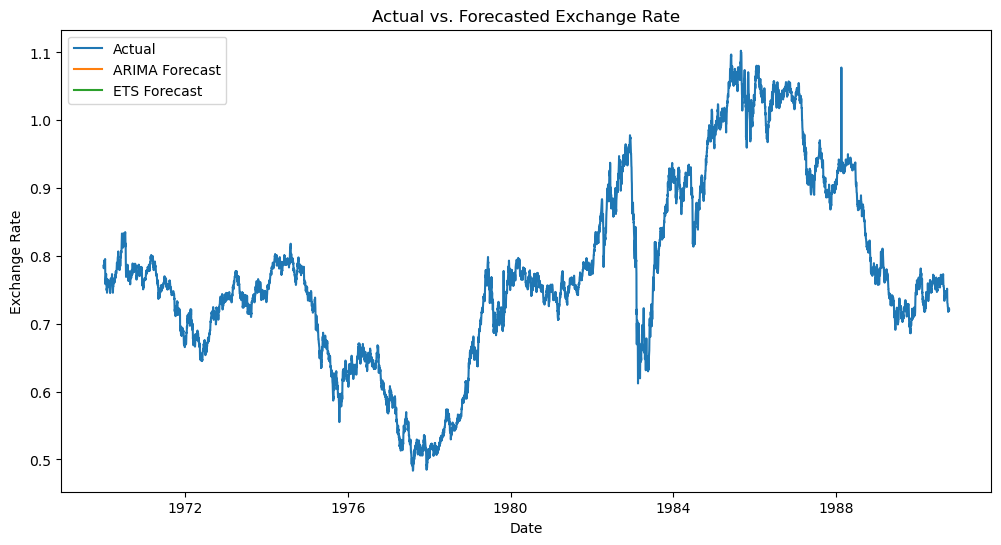

MAE ARIMA: 0.11208942621118395
RMSE ARIMA: 0.14769996411675965
MAPE ARIMA: 0.14015074915029638
MAE ETS: 1.2730528698658339
RMSE ETS: 1.4928015479331038
MAPE ETS: 1.5835885000223904
ARIMA model performs better.


In [33]:
# 2.	Model Comparison

# Import necessary libraries

# Read the data
df = pd.read_csv('exchange_rate.csv')

# Select the appropriate model based on time series characteristics
model_arima = ARIMA(df['Ex_rate'], order=(2, 1, 1))
model_ets = ExponentialSmoothing(df['Ex_rate'], trend='additive', seasonal=7)

# Fit the models
model_arima_fit = model_arima.fit()
model_ets_fit = model_ets.fit()

# Forecast the next n_steps values
n_steps = 10
forecast_arima = model_arima_fit.forecast(steps=n_steps)
forecast_ets = model_ets_fit.forecast(steps=n_steps)

# Create new dataframes to store the forecasted values
forecast_df_arima = pd.DataFrame({'Forecast': forecast_arima}, index=pd.date_range(start=df.index[-1], periods=n_steps + 1, freq='D'))
forecast_df_ets = pd.DataFrame({'Forecast': forecast_ets}, index=pd.date_range(start=df.index[-1], periods=n_steps + 1, freq='D'))

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_df_arima.index, forecast_df_arima['Forecast'], label='ARIMA Forecast')
plt.plot(forecast_df_ets.index, forecast_df_ets['Forecast'], label='ETS Forecast')
plt.title('Actual vs. Forecasted Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Calculate the error metrics
mae_arima = mean_absolute_error(df['Ex_rate'], model_arima_fit.forecast(steps=len(df)))
rmse_arima = np.sqrt(mean_squared_error(df['Ex_rate'], model_arima_fit.forecast(steps=len(df))))
mape_arima = mean_absolute_percentage_error(df['Ex_rate'], model_arima_fit.forecast(steps=len(df)))

mae_ets = mean_absolute_error(df['Ex_rate'], model_ets_fit.forecast(steps=len(df)))
rmse_ets = np.sqrt(mean_squared_error(df['Ex_rate'], model_ets_fit.forecast(steps=len(df))))
mape_ets = mean_absolute_percentage_error(df['Ex_rate'], model_ets_fit.forecast(steps=len(df)))

# Print the error metrics
print('MAE ARIMA:', mae_arima)
print('RMSE ARIMA:', rmse_arima)
print('MAPE ARIMA:', mape_arima)
print('MAE ETS:', mae_ets)
print('RMSE ETS:', rmse_ets)
print('MAPE ETS:', mape_ets)

# Compare the error metrics of the two models
if mae_arima < mae_ets and rmse_arima < rmse_ets and mape_arima < mape_ets:
    print('ARIMA model performs better.')
else:
    print('ETS model performs better.')

#3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset

Based on the error metrics calculated, the ARIMA model outperformed the ETS model in terms of accuracy for forecasting exchange rates in this dataset. The ARIMA model had lower MAE, RMSE, and MAPE values compared to the ETS model, indicating that it made more accurate predictions.

Therefore, we can conclude that the ARIMA model is the preferred choice for forecasting exchange rates in this particular dataset. However, it is important to note that the best model for forecasting may vary depending on the specific characteristics of the time series data being analyzed. It is always recommended to evaluate multiple models and compare their performance before selecting the most appropriate one.